In [44]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import random

In [37]:
%run ./func.ipynb

In [38]:
seed_1 = [
    "3024623179",
    "792681464",
    "500008607",
    "2442616566",
    "1700859064",
    "1383130630",
    "3065145054",
    "229780344",
    "3313177196",
    "622782066"
]

seed_2 = [
    "2510035124",
    "4148510608",
    "1546647050",
    "1797865411",
    "3121839739",
    "941639094",
    "2993550091",
    "337779395",
    "1674616329",
    "3422945056"
]

seed_3 = [
    "3409961121",
    "1423294018",
    "218401457",
    "80357812",
    "3444882003",
    "3038963645",
    "972797172",
    "3728595899",
    "2652762138",
    "3405977524"
]

seed_4 = [
    "2920221540",
    "1918149004",
    "808902977",
    "2088104135",
    "2982487615",
    "1293977630",
    "1554260915",
    "1684239518",
    "1681255897",
    "2299162262"
]

seed_5 = [
    "3094042846",
    "534527979",
    "686711446",
    "3280842469"
]



In [39]:
fix_seed = False
eta = 0.01
mu = 0.05

max_iter = 3_000_000
tau_interval = 10000

save pic: fig/lgda_exp1_seed_3094042846_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_objective.png


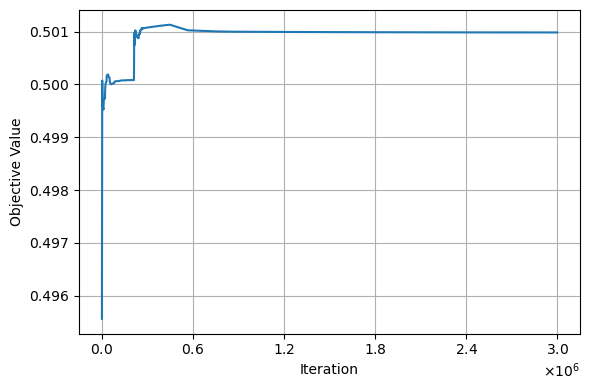

save pic: fig/lgda_exp1_seed_3094042846_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_dx.png


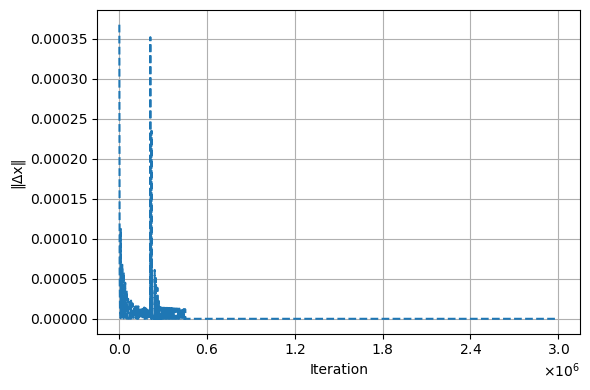

save pic: fig/lgda_exp1_seed_3094042846_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_dy.png


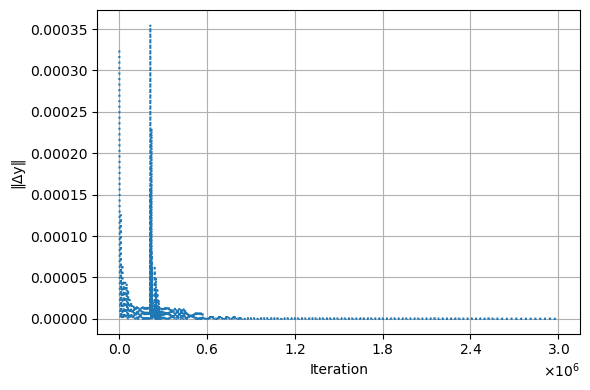

save pic: fig/lgda_exp1_seed_3094042846_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_lambda_summary.png


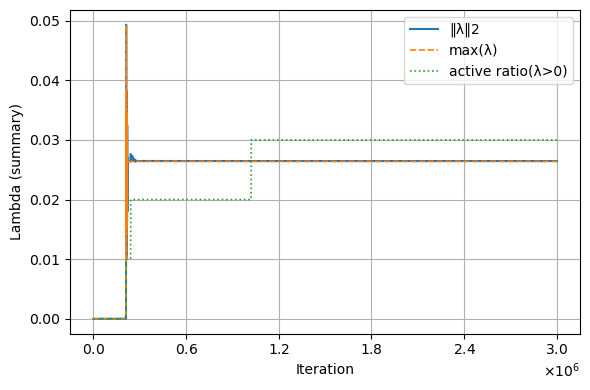

save pic: fig/lgda_exp1_seed_3094042846_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_violation.png


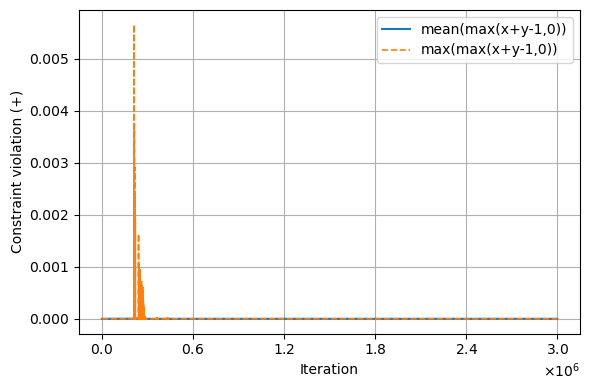

save pic: fig/lgda_exp1_seed_534527979_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_objective.png


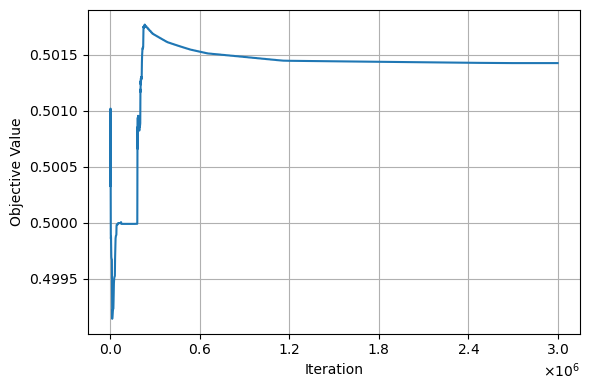

save pic: fig/lgda_exp1_seed_534527979_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_dx.png


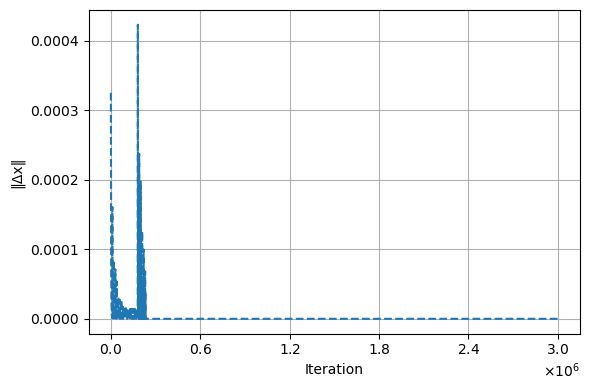

save pic: fig/lgda_exp1_seed_534527979_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_dy.png


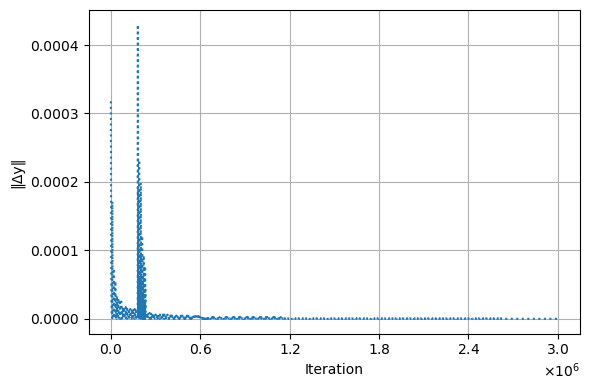

save pic: fig/lgda_exp1_seed_534527979_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_lambda_summary.png


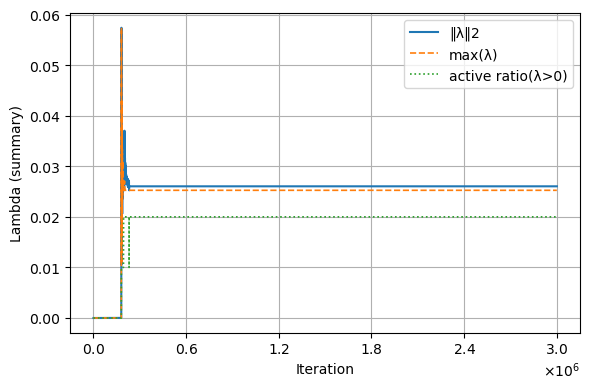

save pic: fig/lgda_exp1_seed_534527979_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_violation.png


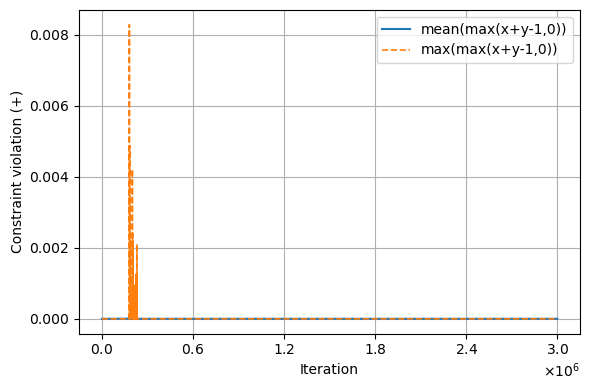

save pic: fig/lgda_exp1_seed_686711446_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_objective.png


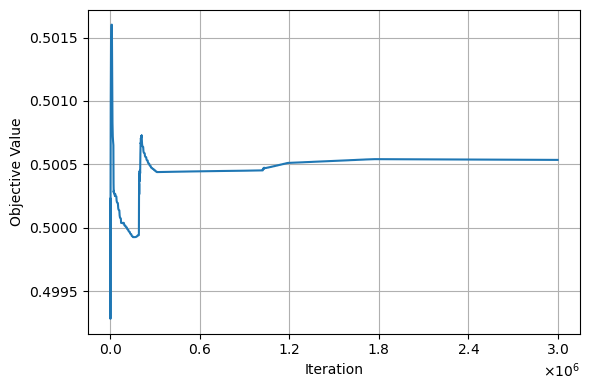

save pic: fig/lgda_exp1_seed_686711446_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_dx.png


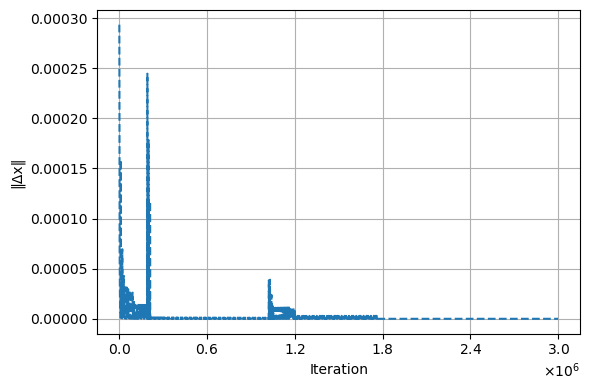

save pic: fig/lgda_exp1_seed_686711446_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000_dy.png


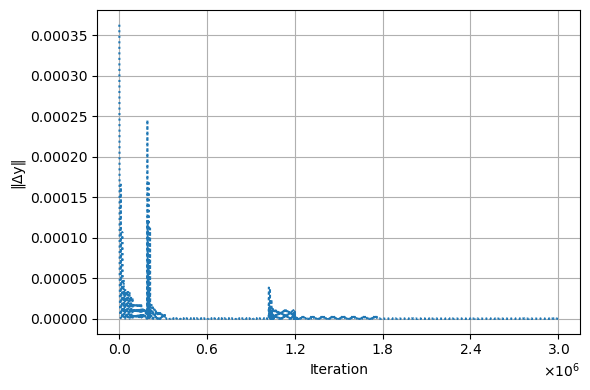

KeyboardInterrupt: 

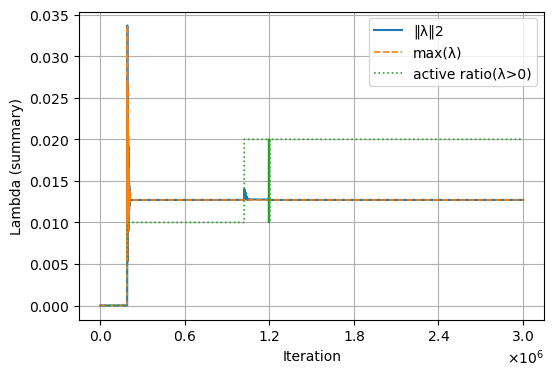

In [40]:
for seed_str in seed_5:
    seed_int = int(seed_str)
    path = f"history/history_seed_{seed_int}_eta_{eta}_mu_{mu}_iter_{max_iter}_tau_{tau_interval}.npz"

    data = np.load(path)
    history = {k: data[k] for k in data.files}

    plot_each_history_component_separately(
        history,
        logy=False,
        fix_seed=False,          # ランダムに実験したいなら False（固定したいなら True）
        save=True,
        save_prefix=f"fig/lgda_exp1_seed_{seed_int}_eta_0.01_mu_0.03_iter_1000000_tau_10000_until_1000000",   # lgda_exp1_1000_objective.png など
        save_ext="png",
    )

## exploiotability

In [46]:
seed_6 = [
    "2404126229",
    "1865124074",
    "2777196934",
    "1708335782",
    "2738297643",
    "1671400497",
    "1207457741",
    "1911085909",
    "1081229945",
    "3739010129"
]

seed_7 = [
"3993452405",
"3951852024",
"1130851199",
"1321174249",
"1112165527",
"3173839802",
"836277949",
"2077614393",
"4260932294",
"1643162299"
]

In [47]:
D, J = 100,100

# a side of the site
num_rows_columns = 50

alpha = 0
beta = 0.01

p = 2
r = 2

h_i = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}

fix_seed = False
eta = 0.01
mu = 0.05

max_iter = 500_000
tau_interval = 10000

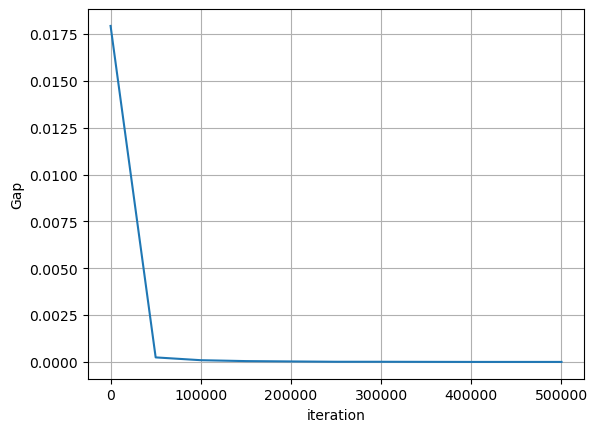

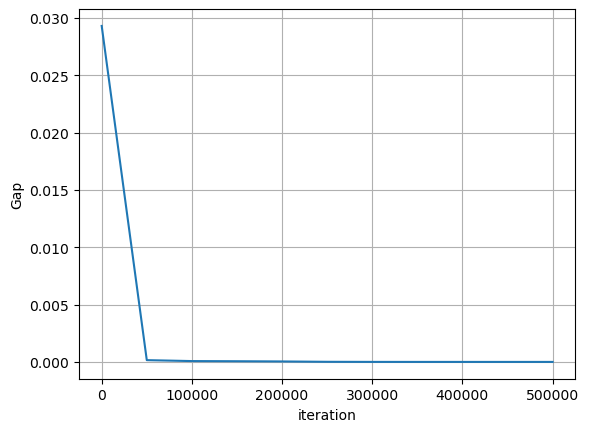

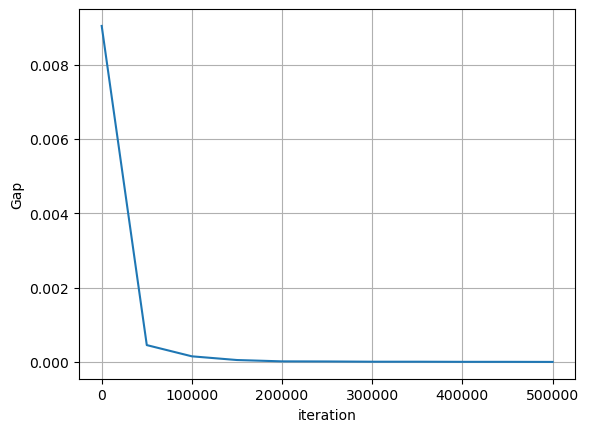

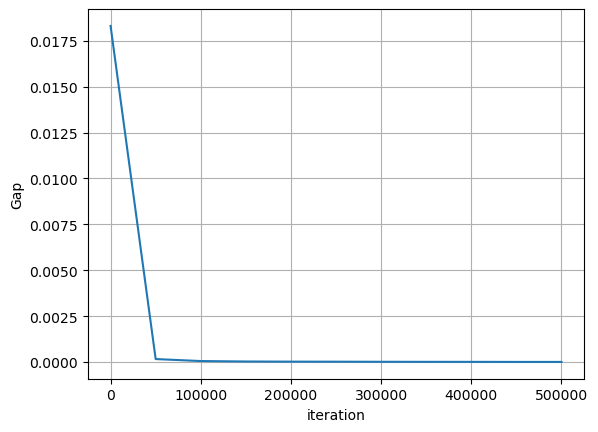

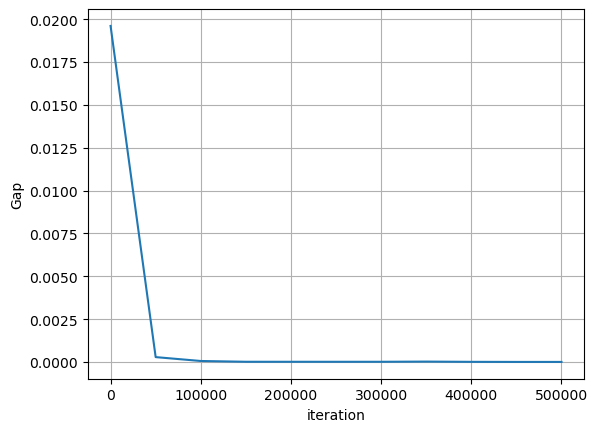

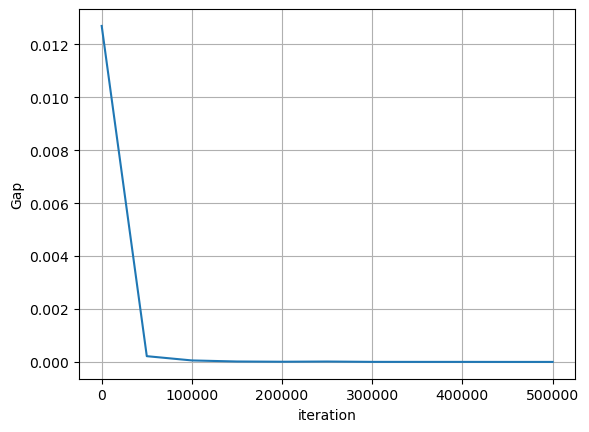

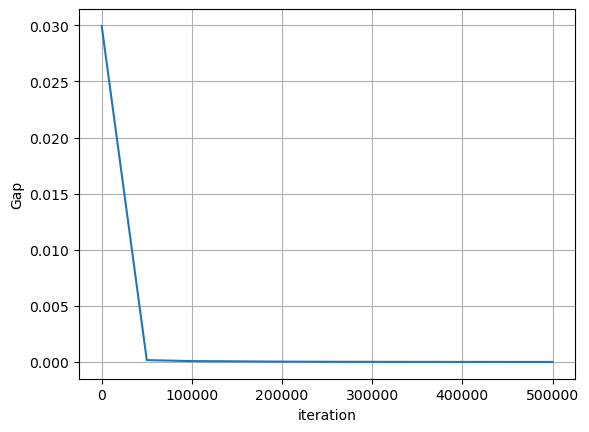

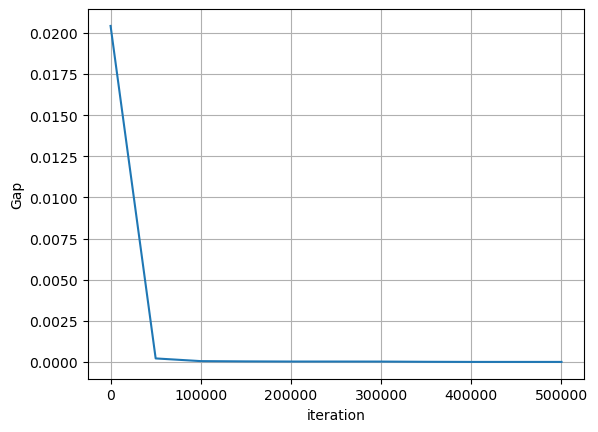

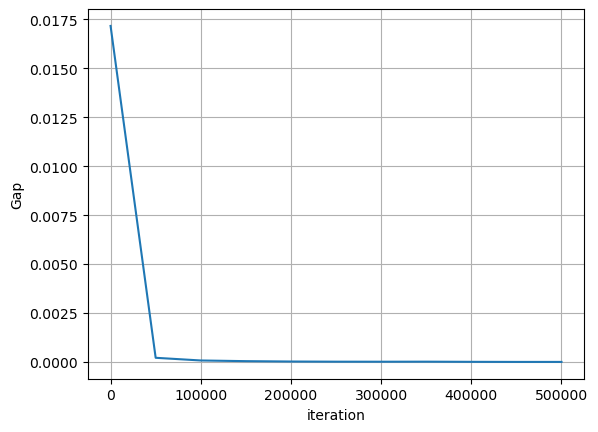

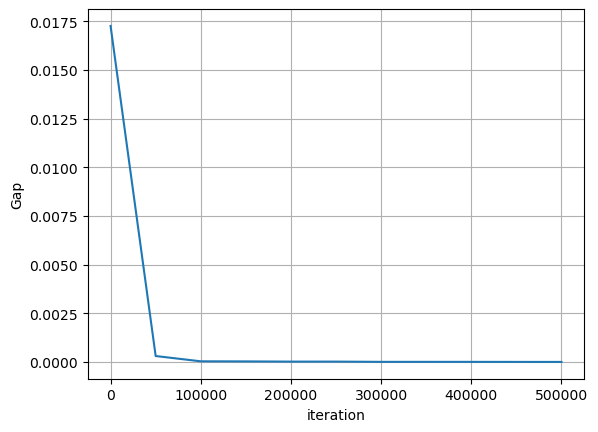

In [48]:
for seed in seed_7:    
    seed_int = int(seed)
    path = f"history/history_seed_{seed_int}_eta_{eta}_mu_{mu}_iter_{max_iter}_tau_{tau_interval}.npz"

    data = np.load(path)
    history = {k: data[k] for k in data.files}

    demand_points, candidate_sites = generate_instance(num_rows_columns, D, J, seed=seed_int)

    gap_res = gap_from_history(
        history,
        p=p, r=r, h=h_i,
        demand_points=demand_points,
        candidate_sites=candidate_sites,
        alpha=alpha, beta=beta,
        J_L=J_L, J_F=J_F,       # ← これで Ui_L/Ui_F も作る
        stride=max_iter*0.1,
        br_step=0.5,
        br_iters=200
    )
    plot_gap(gap_res)